In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

In [21]:
games = pd.read_csv("games.csv")
items = pd.read_csv("user_items.csv")
reviews = pd.read_csv("user_reviews.csv")

GAMES

In [22]:
games.describe(include="all")

,item_id,title,developer,release_date,price
count,2.672900e+04,26729,26729,26729.000000,26729.000000
unique,NaN,26711,10376,NaN,NaN
top,NaN,Soundtrack,Ubisoft - San Francisco,NaN,NaN
freq,NaN,3,1258,NaN,NaN
mean,4.394127e+05,NaN,NaN,2014.850612,9.230376
std,1.856347e+05,NaN,NaN,3.279806,16.112074
min,1.000000e+01,NaN,NaN,1983.000000,0.000000
25%,3.157300e+05,NaN,NaN,2014.000000,2.990000
50%,4.356100e+05,NaN,NaN,2016.000000,4.990000
75%,5.857400e+05,NaN,NaN,2017.000000,9.990000


In [23]:
items.describe(include="all")

,user_id,item_id,playtime_forever
count,3246362,3.246362e+06,3.246362e+06
unique,68403,NaN,NaN
top,chidvd,NaN,NaN
freq,3475,NaN,NaN
mean,NaN,1.771685e+05,1.554285e+03
std,NaN,1.266634e+05,6.717154e+03
min,NaN,1.000000e+01,1.000000e+00
25%,NaN,3.912000e+04,4.400000e+01
50%,NaN,2.149500e+05,2.050000e+02
75%,NaN,2.630200e+05,8.080000e+02


In [24]:
reviews.describe(include="all")

,user_id,item_id,recommend,year_posted,sentiment_analysis
count,48498,48498.000000,48498.000000,48498.000000,48498.000000
unique,22795,NaN,NaN,NaN,NaN
top,SpiritOfDeath2,NaN,NaN,NaN,NaN
freq,10,NaN,NaN,NaN,NaN
mean,NaN,155294.235515,0.898120,2014.148150,1.319993
std,NaN,124542.998755,0.302494,0.842611,0.694700
min,NaN,10.000000,0.000000,2010.000000,0.000000
25%,NaN,6550.000000,1.000000,2014.000000,1.000000
50%,NaN,209080.000000,1.000000,2014.000000,1.000000
75%,NaN,247910.000000,1.000000,2015.000000,2.000000


In [25]:
#Calcular el primer y tercer cuartil de price
Q1 = games['price'].quantile(0.25)
Q3 = games['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Precio x Año de lanzamiento

    se intenta ver como fue creciendo el mercado

In [26]:
"""sns.boxplot(x='año_lanzamiento',y="price",data=games)
plt.show()"""

'sns.boxplot(x=\'año_lanzamiento\',y="price",data=games)\nplt.show()'

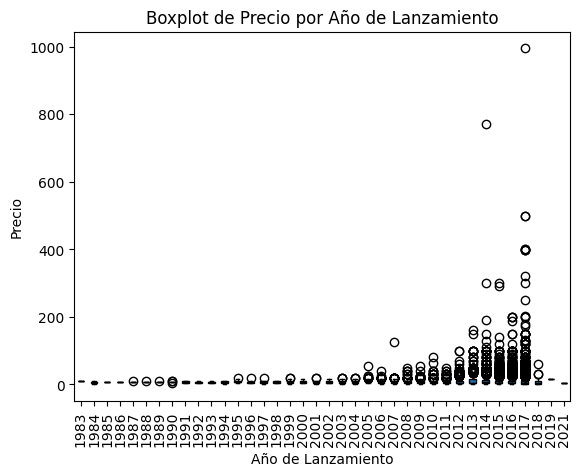

In [27]:
games.sort_values(by="release_date", inplace=True)

plt.boxplot(
    [games[games["release_date"] == año]["price"] for año in games["release_date"].unique()],
    labels=games["release_date"].unique(),
    vert=True,  # Vertical (True) u horizontal (False)
    patch_artist=True,  # Rellenar las cajas con color
    medianprops={'color': 'black'}  # Color de la línea de la mediana
)

plt.xticks(rotation=90)

# Añadir etiquetas y título
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Precio")
plt.title("Boxplot de Precio por Año de Lanzamiento")

# Mostrar el gráfico
plt.show()

In [28]:
#Para remover los outliers
games_price=games[(games['price'] > 0) & (games['price'] < 50)]
games_price


,item_id,title,developer,release_date,price
1266,227380,Dragon's Lair,Digital Leisure Inc.,1983,9.99
17645,517930,The Castles of Dr. Creep,"Ed Hobbs,Robert Crossfield",1984,1.99
1427,240340,Space Ace,Digital Leisure Inc.,1984,9.99
23008,329660,Silent Service,"MicroProse Software, Inc",1985,6.99
9133,664780,Alter Ego,Choose Multiple LLC,1986,7.99
...,...,...,...,...,...
24,716110,Bitcoin Clicker,"lalalaZero,Urbanoff",2018,0.99
26683,756380,Super Bugman Extreme Ultra,SyKoHPaTh,2018,9.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018,4.99
11898,699570,The Legendary Player - Make Your Reputation - ...,Ninetales Studios,2019,14.99


C:\Users\nahue\AppData\Local\Temp\ipykernel_5432\4189159720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_price.sort_values(by="release_date", inplace=True)


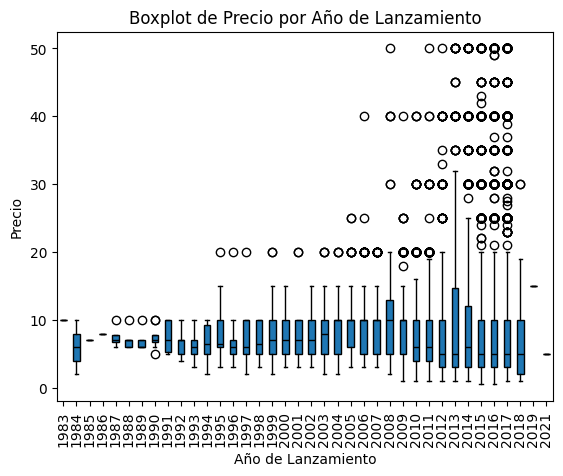

In [29]:
games_price.sort_values(by="release_date", inplace=True)

plt.boxplot(
    [games_price[games_price["release_date"] == año]["price"] for año in games_price["release_date"].unique()],
    labels=games_price["release_date"].unique(),
    vert=True,  # Vertical (True) u horizontal (False)
    patch_artist=True,  # Rellenar las cajas con color
    medianprops={'color': 'black'}  # Color de la línerelease_date
)

plt.xticks(rotation=90)

# Añadir etiquetas y título
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Precio")
plt.title("Boxplot de Precio por Año de Lanzamiento")

# Mostrar el gráfico
plt.show()

Se puede ver que hay muchos outliers, razonando podria ver juegos que son caros, pero hay muchos precios que son imposibles...

Los juegos mas jugados

In [30]:
#Hago un DataSet de games e items para poderlo manipular
top_juegos_jugados = items.sort_values(by='playtime_forever', ascending=False).head(10)
top_juegos_jugados = top_juegos_jugados.merge(games, on="item_id")

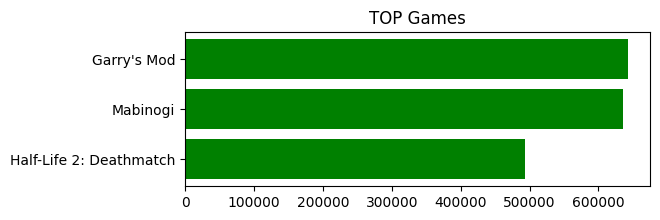

In [31]:
plt.figure(figsize=(6, 2))

plt.barh(top_juegos_jugados['title'], top_juegos_jugados['playtime_forever'], color='Green')
plt.title('TOP Games') 

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.

plt.show()

Positivo vs negativo en reseñas

In [33]:
# Conviertimos los valores booleanos de recommend a valores numéricos
reviews['recommend'] = reviews['recommend'].astype(int)

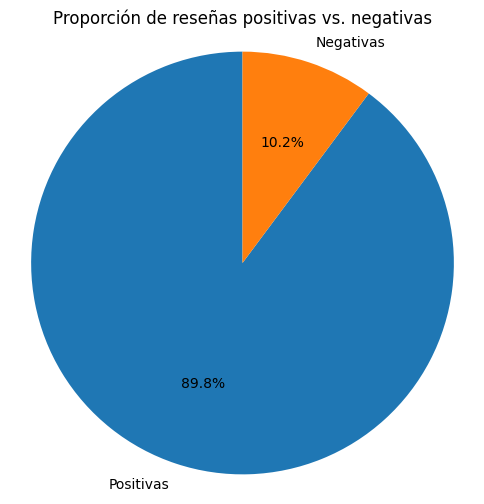

In [34]:
plt.figure(figsize=(6, 6))

# Contar el número de reseñas positivas y negativas
num_positivas = len(reviews[reviews['recommend'] == 1])
num_negativas = len(reviews[reviews['recommend'] == 0])

# Graficar los datos
plt.pie([num_positivas, num_negativas], labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title('Proporción de reseñas positivas vs. negativas')  # Título del gráfico

# Mostrar el gráfico
plt.show()

Analisis de Sentimiento y su distribucion

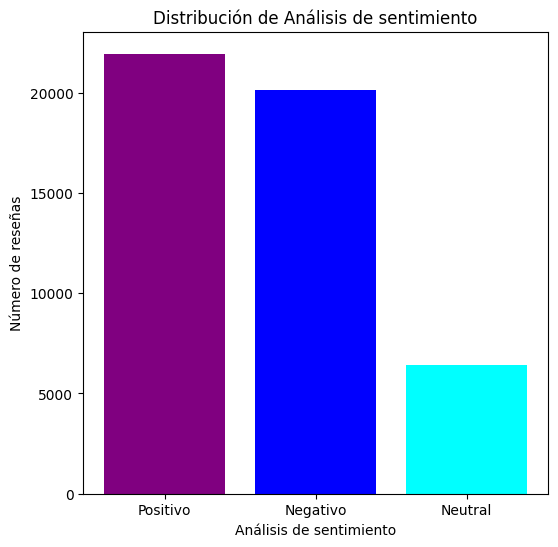

In [35]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.

# Contar el número de reseñas positivas, negativas y neutrales
num_positivas = len(reviews[reviews['sentiment_analysis'] == 2])
num_negativas = len(reviews[reviews['sentiment_analysis'] == 1])
num_neutrales = len(reviews[reviews['sentiment_analysis'] == 0])

# Graficar los datos
plt.bar(['Positivo', 'Negativo', 'Neutral'], [num_positivas, num_negativas, num_neutrales], color=['purple', 'blue', 'cyan'])
plt.xlabel('Análisis de sentimiento')  # Etiqueta del eje X
plt.ylabel('Número de reseñas')  # Etiqueta del eje Y
plt.title('Distribución de Análisis de sentimiento')  # Título del gráfico

# Mostrar el gráfico
plt.show()

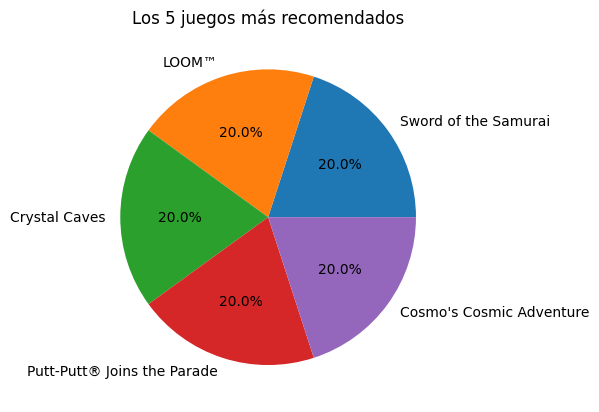

In [36]:
merged_df = pd.merge(games, reviews, on='item_id')
# Seleccionar los 5 juegos más recomendados y eliminar los duplicados
top_recomendados = merged_df.drop_duplicates(subset='title').nlargest(5, 'recommend')

# Crear un gráfico de torta  que muestra el nombre del juego y la cantidad de recomendaciones
plt.pie(top_recomendados['recommend'], labels=top_recomendados['title'], autopct='%1.1f%%')
plt.title('Los 5 juegos más recomendados')
plt.show()